## Intro

* Here we compare an PARAFAC decomposition when all the factors are unknown with when one factor is known beforehand.
* We then compare the use of two Unfolding fuctions, one from tensorly and one adapted from another library

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorly as tl
from scipy import linalg
import tensorly.decomposition as tldecomp
import tensorly.metrics as tlmetrics

Using numpy backend.


In [22]:
def tensorEye(I1,I2,I3):
    out=np.zeros((I1,I2,I3)) 
    for i1 in range(0,I1):
        for i2 in range (0,I2):
            for i3 in range(0,I3):
                if (i1==i2==i3): out[i1,i2,i3]=1
    return out

In [23]:
def from_to_without(frm, to, without, step=1, skip=1, reverse=False, separate=False):
    if reverse:
        frm, to = (to - 1), (frm - 1)
        step *= -1
        skip *= -1
    a = list(range(frm, without, step))
    b = list(range(without + skip, to, step))
    if separate:
        return a, b
    else:
        return a + b

In [24]:
def unfold(tensor, mode):
    sz = np.array(tensor.shape)
    N = len(sz)
    order = ([mode], from_to_without(N - 1, -1, mode, step=-1, skip=-1))
    newsz = (sz[order[0]][0], np.prod(sz[order[1]]))
    arr = np.transpose(tensor,axes=(order[0] + order[1]))
    arr = arr.reshape(newsz)
    return arr

## Parametros

In [25]:
I1=3
I2=3
I3=3
Rank=3
Ts=tl.random.cp_tensor(shape=(I1,I2,I3),rank=Rank,full=True)

In [26]:
eye=tensorEye(Rank,Rank,Rank)
print(eye)

[[[ 1.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  1.]]]


## ALS with all factors Unknown

In [27]:
itermax=1000
epsilon1=[]
A2=np.random.rand(I2,Rank)
A3=np.random.rand(I3,Rank)
for ii in range(itermax):
    krtransposed=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A3,A2])))
    A1=np.dot(unfold(tensor=Ts,mode=0),krtransposed)
    krtransposed=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A3,A1])))
    A2=np.dot(unfold(tensor=Ts,mode=1),krtransposed)
    krtransposed=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A2,A1])))
    A3=np.dot(unfold(tensor=Ts,mode=2),krtransposed)
    error=tlmetrics.MSE(y_pred=tl.tenalg.multi_mode_dot(eye,matrix_or_vec_list=[A1, A2, A3]),y_true=Ts)
    epsilon1.append(error)
Xhat1=tl.tenalg.multi_mode_dot(eye,matrix_or_vec_list=[A1, A2, A3])

In [28]:
Xhat1

array([[[ 0.10205103,  0.05955429,  0.06479719],
        [ 0.16946641,  0.08291064,  0.11735714],
        [ 0.06453936,  0.01365965,  0.0299291 ]],

       [[ 0.13217774,  0.11330778,  0.11201289],
        [ 0.26808455,  0.17563451,  0.21943274],
        [ 0.09011069,  0.02092944,  0.04339718]],

       [[ 0.07608722,  0.10884609,  0.09780342],
        [ 0.22426371,  0.18467153,  0.21225379],
        [ 0.06434099,  0.01673344,  0.03259872]]])

In [31]:
Ts

array([[[ 0.10211695,  0.05947685,  0.0648105 ],
        [ 0.16962305,  0.08270329,  0.11754916],
        [ 0.0643227 ,  0.01409301,  0.02904149]],

       [[ 0.13214341,  0.11350763,  0.11185916],
        [ 0.26788703,  0.17585608,  0.21924092],
        [ 0.09060472,  0.02112976,  0.04354742]],

       [[ 0.07605382,  0.10859555,  0.09806396],
        [ 0.22441334,  0.18463621,  0.2122455 ],
        [ 0.06376077,  0.01577281,  0.03358761]]])

## ALS com uma matriz fator conhecida

In [32]:
itermax=1000
epsilon2=[]
A2=np.random.rand(I2,Rank)
A3=np.random.rand(I3,Rank)
for ii in range(itermax):
    # krtransposto=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A3,A2])))
    # A1=np.dot(unfold(tensor=Ts,mode=0),krtransposto)
    krtransposed=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A3,A1])))
    A2=np.dot(unfold(tensor=Ts,mode=1),krtransposed)
    krtransposed=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A2,A1])))
    A3=np.dot(unfold(tensor=Ts,mode=2),krtransposed)
    error=tlmetrics.MSE(y_pred=tl.tenalg.multi_mode_dot(eye,matrix_or_vec_list=[A1, A2, A3]),y_true=Ts)
    epsilon2.append(error)
Xhat2=tl.tenalg.multi_mode_dot(eye,matrix_or_vec_list=[A1, A2, A3])

In [33]:
Xhat2

array([[[ 0.10206315,  0.05955686,  0.0648114 ],
        [ 0.16949292,  0.08288878,  0.11739852],
        [ 0.06453326,  0.01367571,  0.02991323]],

       [[ 0.13215704,  0.11330318,  0.11200608],
        [ 0.26805025,  0.17561745,  0.2194313 ],
        [ 0.0901116 ,  0.02094605,  0.04337188]],

       [[ 0.0761055 ,  0.10884437,  0.09780384],
        [ 0.22428108,  0.18469678,  0.21224151],
        [ 0.06436008,  0.01674142,  0.03258148]]])

In [34]:
Ts

array([[[ 0.10211695,  0.05947685,  0.0648105 ],
        [ 0.16962305,  0.08270329,  0.11754916],
        [ 0.0643227 ,  0.01409301,  0.02904149]],

       [[ 0.13214341,  0.11350763,  0.11185916],
        [ 0.26788703,  0.17585608,  0.21924092],
        [ 0.09060472,  0.02112976,  0.04354742]],

       [[ 0.07605382,  0.10859555,  0.09806396],
        [ 0.22441334,  0.18463621,  0.2122455 ],
        [ 0.06376077,  0.01577281,  0.03358761]]])

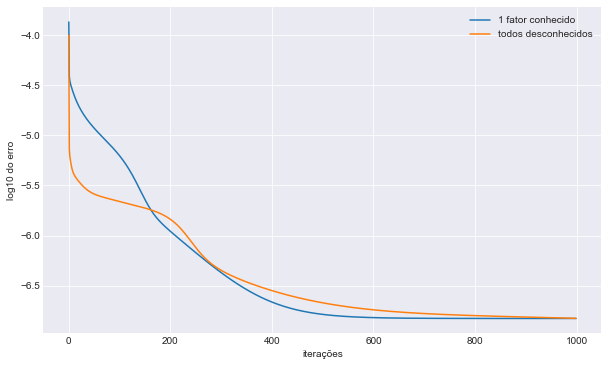

In [35]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,6))
plt.plot(np.log10(epsilon2))
plt.plot(np.log10(epsilon1))
plt.ylabel('log10 of the MSE')
plt.xlabel('iterations')
plt.legend(['1 known factor','all desconhecidos'])
plt.show()

## With Tensorly Unfold

In [37]:
itermax=1000
epsilon1=[]
A2=np.random.rand(I2,Rank)
A3=np.random.rand(I3,Rank)
for ii in range(itermax):
    krtransposto=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A3,A2])))
    A1=np.dot(tl.unfold(tensor=Ts,mode=0),krtransposto)
    krtransposto=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A3,A1])))
    A2=np.dot(tl.unfold(tensor=Ts,mode=1),krtransposto)
    krtransposto=linalg.pinv(tl.transpose(tl.tenalg.khatri_rao([A2,A1])))
    A3=np.dot(tl.unfold(tensor=Ts,mode=2),krtransposto)
    error=tlmetrics.MSE(y_pred=tl.tenalg.multi_mode_dot(eye,matrix_or_vec_list=[A1, A2, A3]),y_true=Ts)
    epsilon1.append(error)
Xhat3=tl.tenalg.multi_mode_dot(eye,matrix_or_vec_list=[A1, A2, A3])

In [38]:
Xhat3

array([[[ 0.07386131,  0.04414601,  0.05522585],
        [ 0.13641913,  0.08153606,  0.10200012],
        [ 0.02892424,  0.01728767,  0.02162655]],

       [[ 0.12469285,  0.07452741,  0.09323242],
        [ 0.23030314,  0.1376494 ,  0.17219687],
        [ 0.04882997,  0.02918508,  0.03651   ]],

       [[ 0.10823765,  0.06469233,  0.08092892],
        [ 0.19991099,  0.11948438,  0.14947277],
        [ 0.04238608,  0.02533365,  0.03169193]]])

In [39]:
Ts

array([[[ 0.10211695,  0.05947685,  0.0648105 ],
        [ 0.16962305,  0.08270329,  0.11754916],
        [ 0.0643227 ,  0.01409301,  0.02904149]],

       [[ 0.13214341,  0.11350763,  0.11185916],
        [ 0.26788703,  0.17585608,  0.21924092],
        [ 0.09060472,  0.02112976,  0.04354742]],

       [[ 0.07605382,  0.10859555,  0.09806396],
        [ 0.22441334,  0.18463621,  0.2122455 ],
        [ 0.06376077,  0.01577281,  0.03358761]]])